In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
def power_law_stacked(X, a, b, c):
    noverlaps, nmo = X[:, 0], X[:, 1]
    return a * np.power(noverlaps, b) * np.power(nmo, c)

def power_law(X, a, b):
    return a * np.power(X, b)

def line(X, a, b):
    return a + b * X

In [4]:
df = pd.read_csv("bound.csv")
df['zeta'] = df.nel

In [5]:
popt, pcov = curve_fit(power_law, df.n.values, df.bound.values)
sigma = np.sqrt(np.diagonal(pcov))
print(popt)

# popt, pcov = curve_fit(line, np.log10(df.n.values), np.log10(df.bound.values))
# popt[0] = 10**popt[0]
# pcov[0] = 10**pcov[0]
# print(np.sqrt(np.diagonal(pcov)))
# print(popt)

df['bound_fit'] = df.apply(lambda x: power_law(x.n, *popt), axis=1)
df['bound_sqrt'] = df.apply(lambda x: np.sqrt(x.n), axis=1)
dfm = pd.melt(df, id_vars=["n"], value_name="bnd", var_name="type", value_vars=["bound", "bound_fit", "bound_sqrt"])
display(dfm)

[0.9556888  0.49900297]


,n,type,bnd
0,4.0,bound,1.918519
1,12.0,bound,3.302680
2,20.0,bound,4.259997
3,28.0,bound,5.038455
4,36.0,bound,5.711719
5,44.0,bound,6.313559
6,52.0,bound,6.862804
7,60.0,bound,7.371227
8,68.0,bound,7.846770
9,76.0,bound,8.295092


In [6]:
# X = df[['n', 'zeta']].values
# y = df['bound'].values
# popt, pcov = curve_fit(power_law_stacked, X, y)
# print(popt)


# df['bound_fit'] = df.apply(lambda x: power_law_stacked(np.atleast_2d([x.n, x.zeta]), *popt)[0], axis=1)
# dfm = pd.melt(df, id_vars=["n", "zeta"], value_name="type", var_name="eb", )

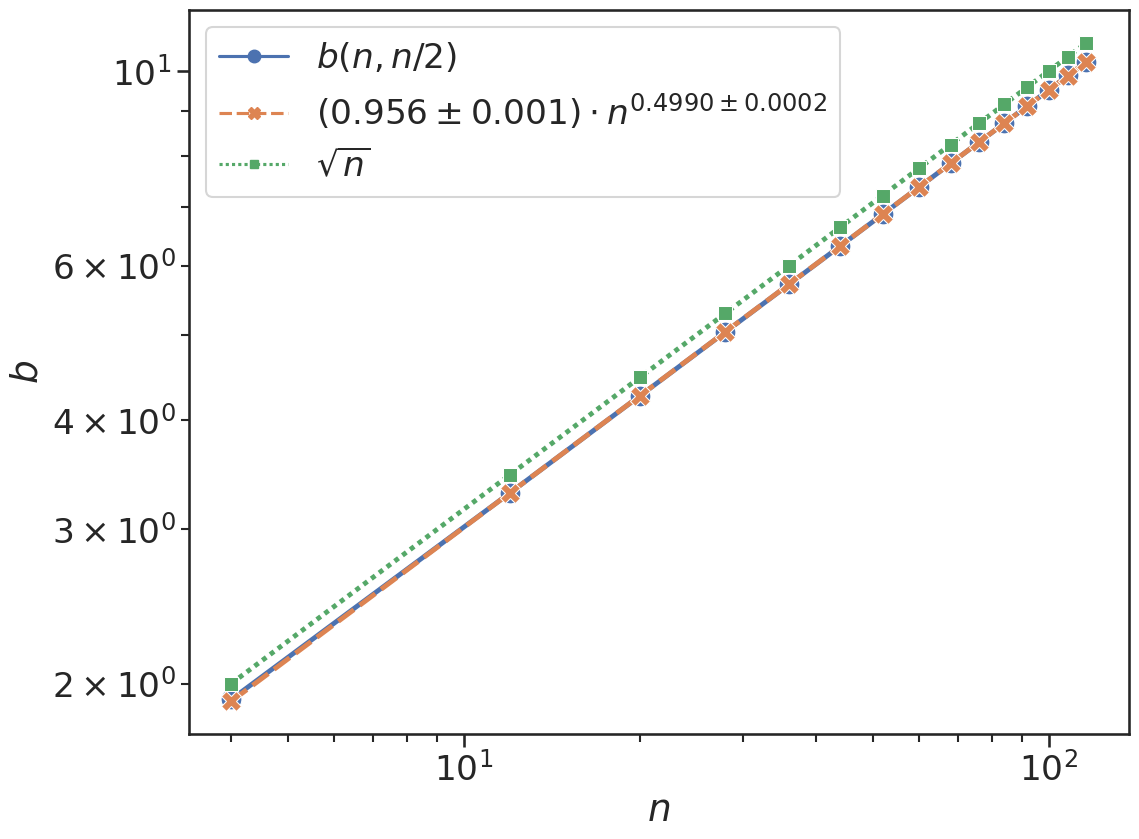

In [15]:
sns.set_theme(context="talk", font_scale=1.5, style="ticks")

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 9)

g = sns.lineplot(data=dfm, x="n", y="bnd", hue="type", style="type", markers=True, marker="o", ax=ax,
                 linewidth=3.5, markersize=15)
# sns.lineplot(data=df, x="zeta", y="bound_fit", hue="n", markers=True, marker="*", ax=ax)
ax.set_yscale("log")
ax.set_xscale("log")

# ax.legend(labels=[, "", rf"${popt[0]:.2f} \cdot n^{popt[1]:.2f}$", ""], loc="upper left", bbox_to_anchor=(1.04, 1.0), title=None)
txts = g.get_legend().texts
g.get_legend().set_title(None)
txts[0].set_text(r"$b(n, n/2)$")
txts[1].set_text(rf"(${popt[0]:.3f} \pm {sigma[0]:.3f})" + r"\cdot n^{" + rf"{popt[1]:.4f} \pm {sigma[1]:.4f}" + r"}$")
txts[2].set_text(r"$\sqrt{n}$")

ax.set_ylabel(r"$b$")
ax.set_xlabel(r"$n$")
plt.tight_layout()

plt.savefig("bound_sqrt.pdf", dpi=300)
plt.savefig("bound_sqrt.png", dpi=300)